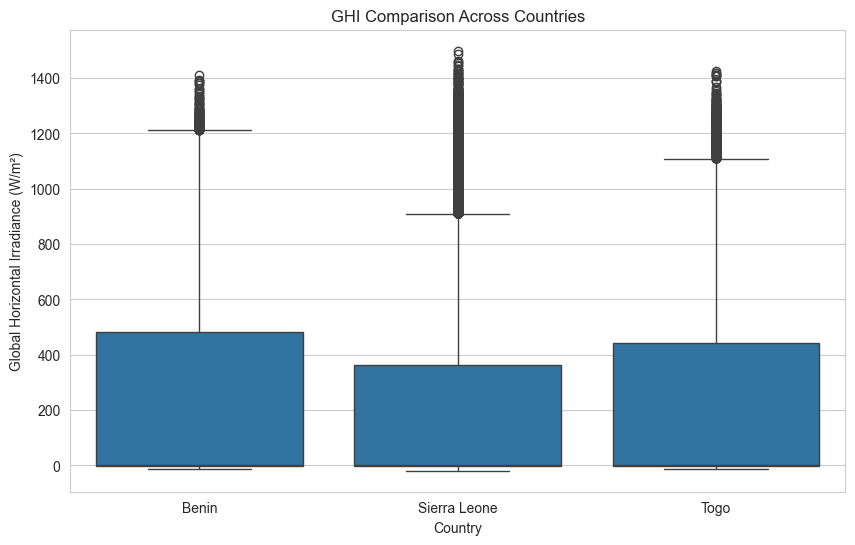

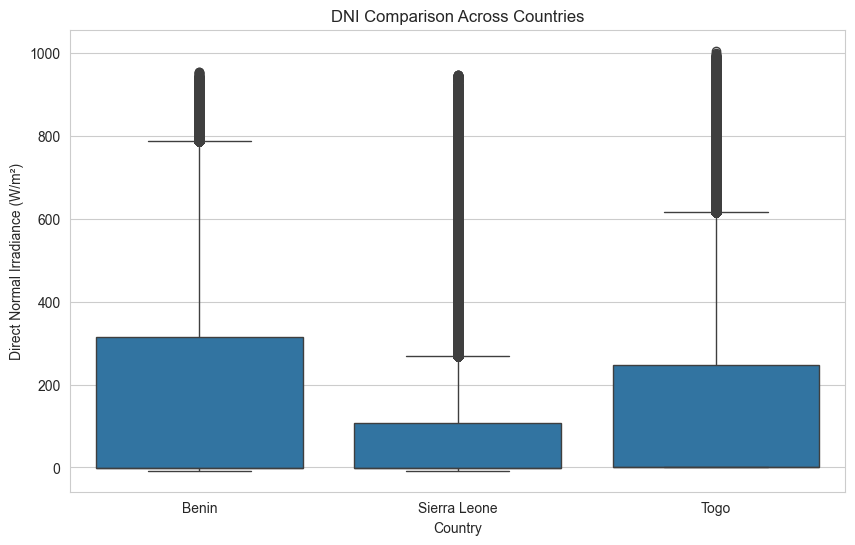

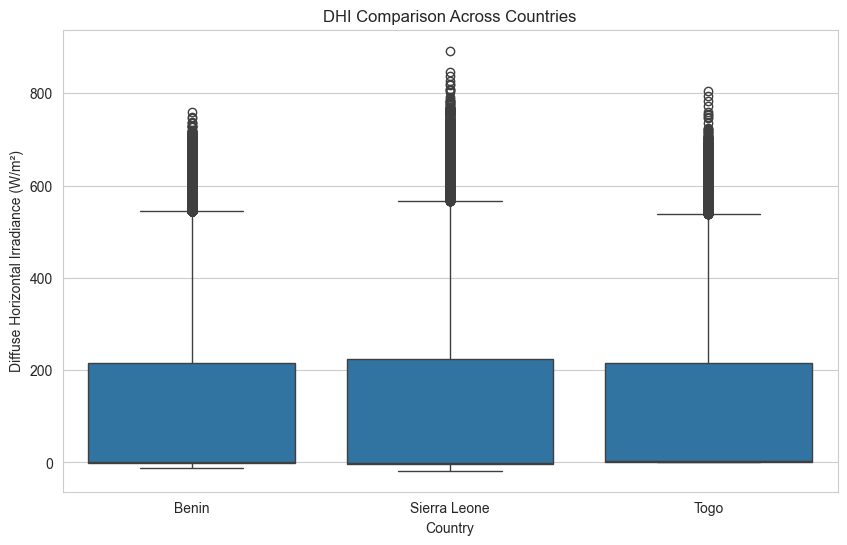

                GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
Country                                                                    
Benin         240.559452         1.8  331.131327  167.187516        -0.1   
Sierra Leone  201.957515         0.3  298.495150  116.376337        -0.1   
Togo          230.555040         2.1  322.532347  151.258469         0.0   

                 DNI_std    DHI_mean  DHI_median     DHI_std  
Country                                                       
Benin         261.710501  115.358961         1.6  158.691074  
Sierra Leone  218.652659  113.720571        -0.1  158.946032  
Togo          250.956962  116.444352         2.5  156.520714  
Shapiro-Wilk for Benin GHI: p=0.0000
Shapiro-Wilk for Sierra Leone GHI: p=0.0000
Shapiro-Wilk for Togo GHI: p=0.0000
Levene’s test p-value: 0.0000
ANOVA p-value for GHI: 0.0


/Users/jerus/Desktop/KAIM/solar-challenge-week1/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 525600.
  res = hypotest_fun_out(*samples, **kwds)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, levene

# Load data
benin = pd.read_csv("../data/benin-malanville.csv", parse_dates=['Timestamp'])
sierraleone = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=['Timestamp'])
togo = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=['Timestamp'])

benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

combined = pd.concat([benin, sierraleone, togo], ignore_index=True)

sns.set_style('whitegrid')

# Boxplots
for col, ylabel in [('GHI', 'Global Horizontal Irradiance (W/m²)'),
                    ('DNI', 'Direct Normal Irradiance (W/m²)'),
                    ('DHI', 'Diffuse Horizontal Irradiance (W/m²)')]:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Country', y=col, data=combined)
    plt.title(f'{col} Comparison Across Countries')
    plt.ylabel(ylabel)
    plt.show()

# Summary stats with flattened columns
summary = combined.groupby('Country')[['GHI','DNI','DHI']].agg(['mean','median','std'])
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
print(summary)

# Test assumptions for GHI
groups = [group['GHI'].values for name, group in combined.groupby('Country')]

for name, group in combined.groupby('Country'):
    stat, p = shapiro(group['GHI'])
    print(f'Shapiro-Wilk for {name} GHI: p={p:.4f}')

stat, p = levene(*groups)
print(f'Levene’s test p-value: {p:.4f}')

# ANOVA or Kruskal-Wallis based on assumptions
anova_result = f_oneway(*groups)
print("ANOVA p-value for GHI:", anova_result.pvalue)

# If assumptions fail, use Kruskal-Wallis instead
# kruskal_result = kruskal(*groups)
# print("Kruskal-Wallis p-value for GHI:", kruskal_result.pvalue)
